# Dermatology Multi-class classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d olcaybolat1/dermatology-dataset-classification

Dataset URL: https://www.kaggle.com/datasets/olcaybolat1/dermatology-dataset-classification
License(s): other
dermatology-dataset-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
# Extracting data from zipfile

from zipfile import ZipFile

with ZipFile('/content/dermatology-dataset-classification.zip', 'r') as zip:
  zip.extractall()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/dermatology_database_1.csv')

In [5]:
df.head(5)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [6]:
df.shape

(366, 35)

In [7]:
df.size

12810

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
erythema,366.0,2.068306,0.664753,0.0,2.0,2.0,2.0,3.0
scaling,366.0,1.795082,0.701527,0.0,1.0,2.0,2.0,3.0
definite_borders,366.0,1.549180,0.907525,0.0,1.0,2.0,2.0,3.0
itching,366.0,1.366120,1.138299,0.0,0.0,1.0,2.0,3.0
koebner_phenomenon,366.0,0.633880,0.908016,0.0,0.0,0.0,1.0,3.0
polygonal_papules,366.0,0.448087,0.957327,0.0,0.0,0.0,0.0,3.0
follicular_papules,366.0,0.166667,0.570588,0.0,0.0,0.0,0.0,3.0
oral_mucosal_involvement,366.0,0.377049,0.834147,0.0,0.0,0.0,0.0,3.0
knee_and_elbow_involvement,366.0,0.614754,0.982979,0.0,0.0,0.0,1.0,3.0
scalp_involvement,366.0,0.519126,0.905639,0.0,0.0,0.0,1.0,3.0


In [10]:
df.dtypes

,0
erythema,int64
scaling,int64
definite_borders,int64
itching,int64
koebner_phenomenon,int64
polygonal_papules,int64
follicular_papules,int64
oral_mucosal_involvement,int64
knee_and_elbow_involvement,int64
scalp_involvement,int64


In [11]:
df.isnull().sum()

,0
erythema,0
scaling,0
definite_borders,0
itching,0
koebner_phenomenon,0
polygonal_papules,0
follicular_papules,0
oral_mucosal_involvement,0
knee_and_elbow_involvement,0
scalp_involvement,0


In [12]:
df.duplicated().sum()

0

In [13]:
df.nunique()

,0
erythema,4
scaling,4
definite_borders,4
itching,4
koebner_phenomenon,4
polygonal_papules,4
follicular_papules,4
oral_mucosal_involvement,4
knee_and_elbow_involvement,4
scalp_involvement,4


In [14]:
unique_age = df['age'].unique()

print(f'Unique ages: {unique_age}')

Unique ages: ['55' '8' '26' '40' '45' '41' '18' '57' '22' '30' '20' '21' '10' '65' '38'
 '23' '17' '51' '42' '44' '33' '43' '50' '34' '?' '15' '46' '62' '35' '48'
 '12' '52' '60' '32' '19' '29' '25' '36' '13' '27' '31' '28' '64' '39'
 '47' '16' '0' '7' '70' '37' '61' '67' '56' '53' '24' '58' '49' '63' '68'
 '9' '75']


## Data Visualization

In [15]:
df_dv = df.copy()

<Figure size 3000x3500 with 0 Axes>

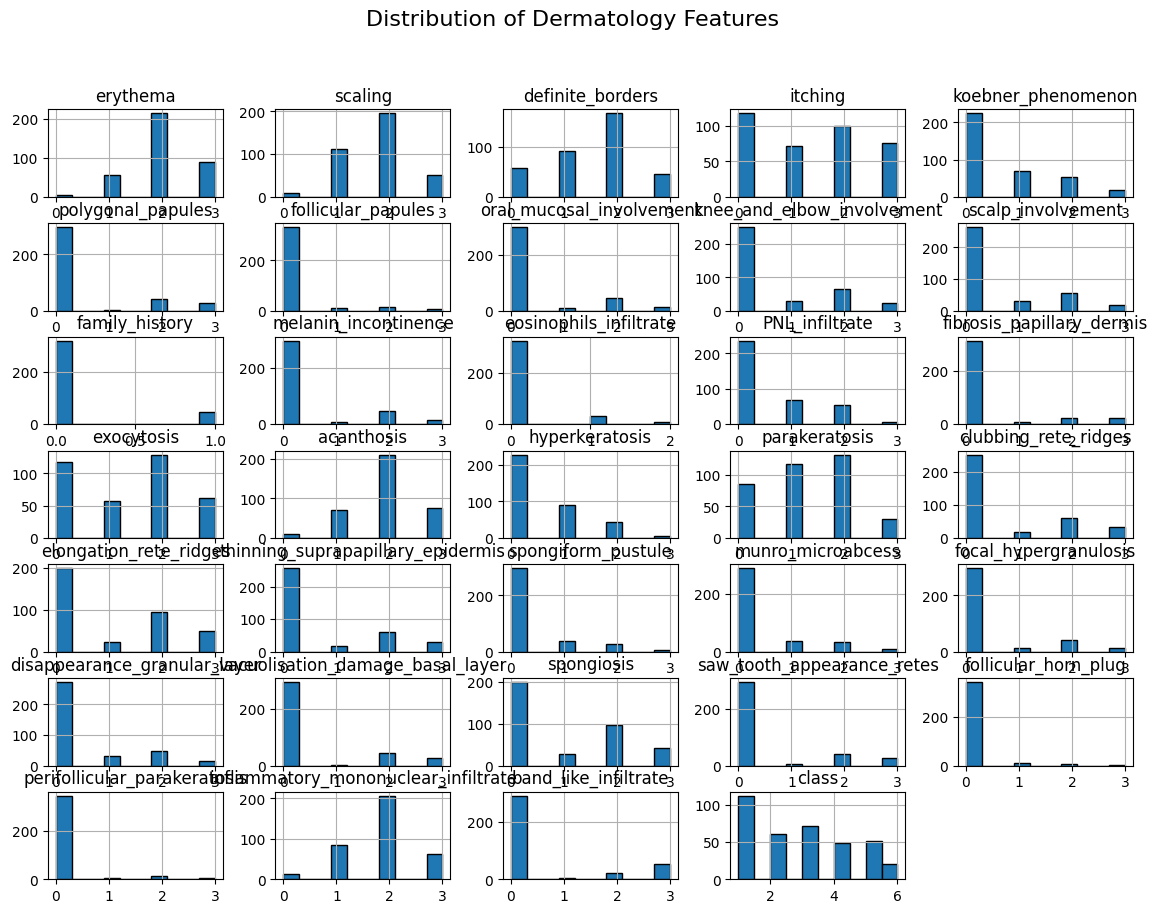

In [16]:
# Distribution of Numeric Features

plt.figure(figsize=(30, 35))
df_dv.hist(figsize=(14, 10), bins=10, edgecolor='black', layout=(7, 5))
plt.suptitle('Distribution of Dermatology Features', fontsize=16)
plt.show()

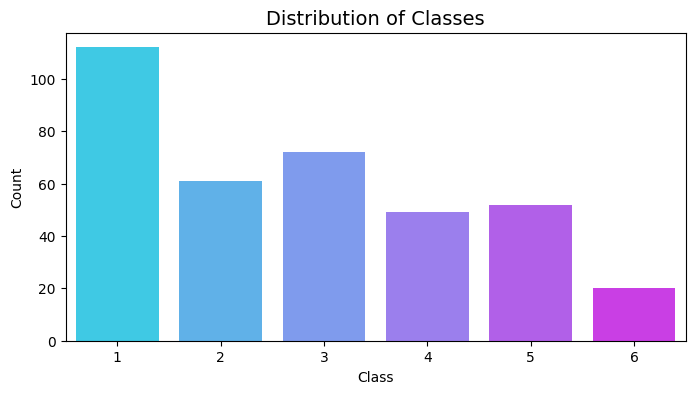

In [17]:
# Class Distribution

plt.figure(figsize=(8,4))
sns.countplot(data= df_dv, x='class', palette='cool')
plt.title('Distribution of Classes', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

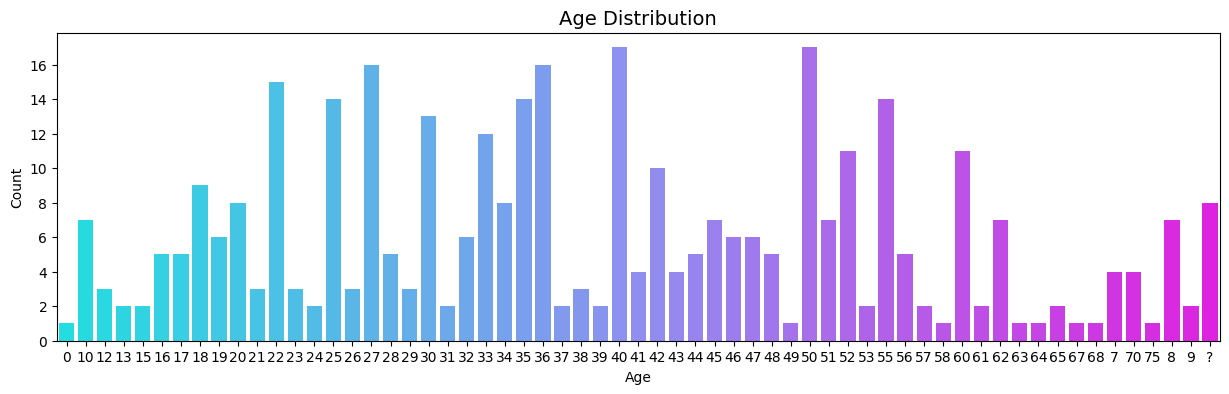

In [18]:
# Age Distribution

sorted_age = df_dv['age'].sort_values().unique()
plt.figure(figsize=(15,4))
sns.countplot(data = df_dv, x='age', palette='cool', order=sorted_age)
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

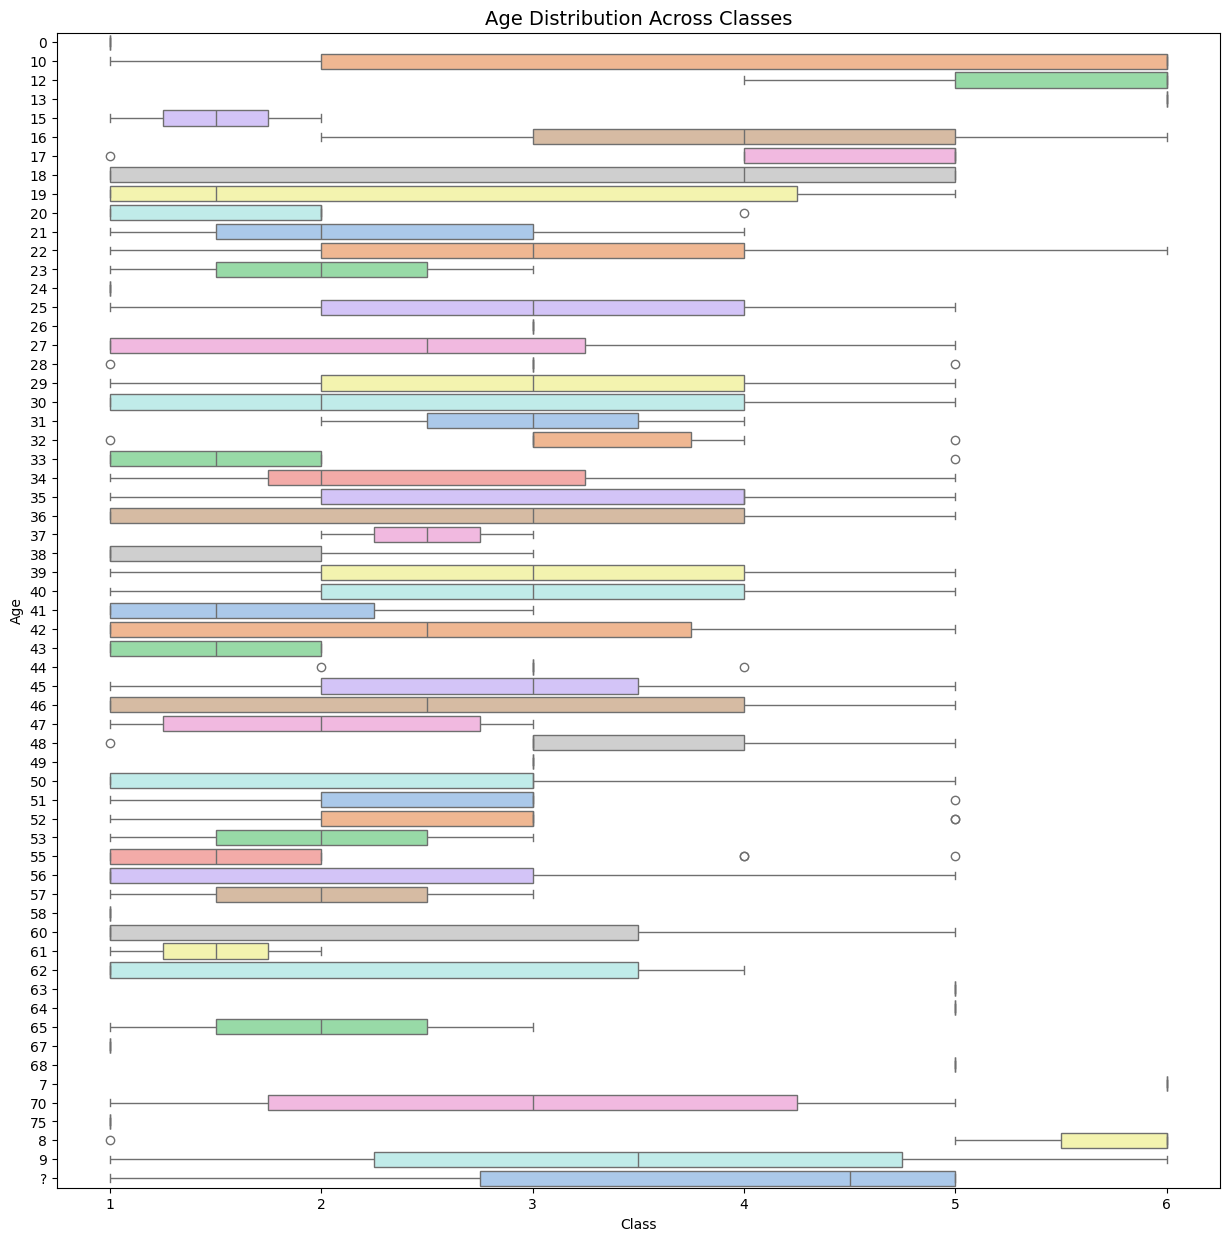

In [19]:
# Boxplot for Age Across Classes

plt.figure(figsize=(15, 15))
sns.boxplot(data=df_dv, x='class', y='age', palette='pastel', order=sorted_age)
plt.title('Age Distribution Across Classes', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

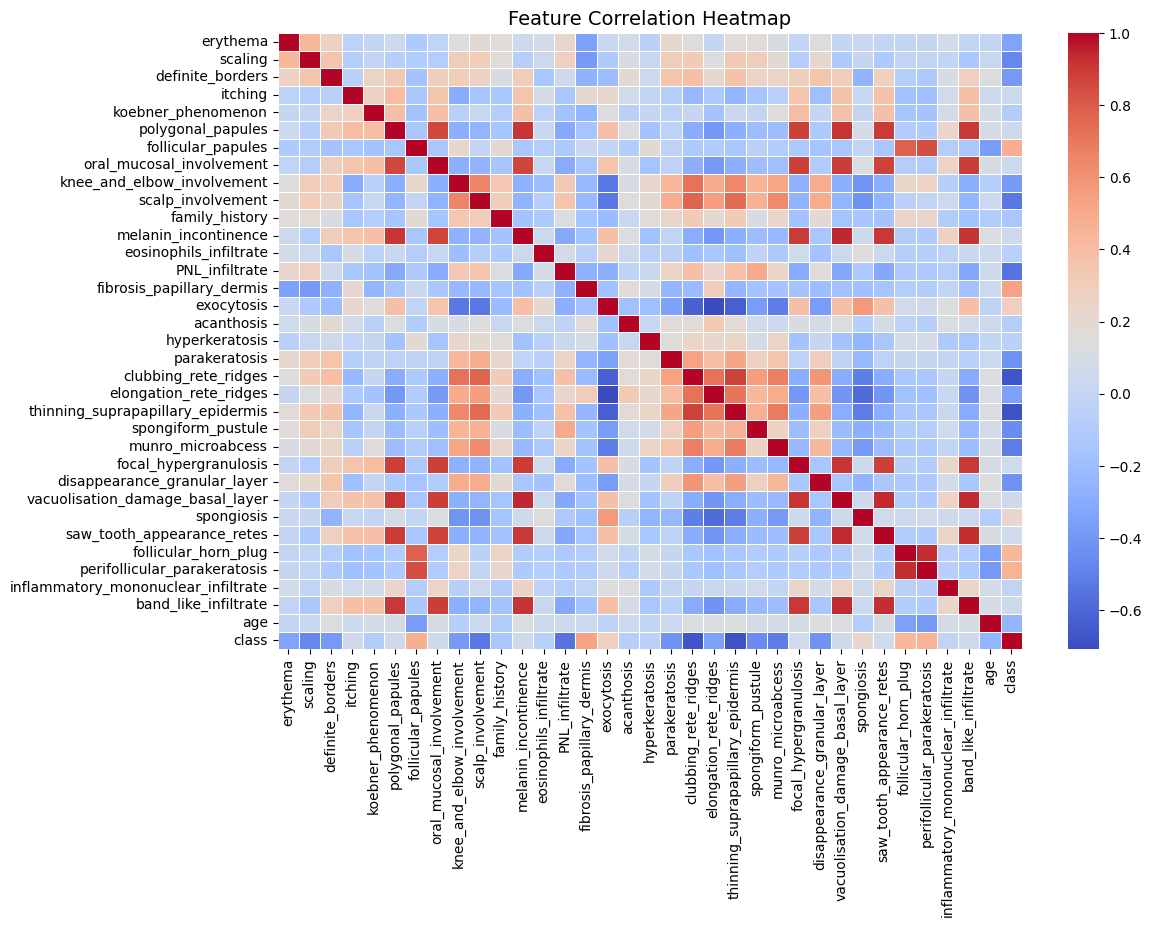

In [20]:
# Heatmap of Feature Correlations

df_dv['age'] = pd.to_numeric(df_dv['age'].replace('?', np.nan))

plt.figure(figsize=(12, 8))
sns.heatmap(df_dv.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.show()

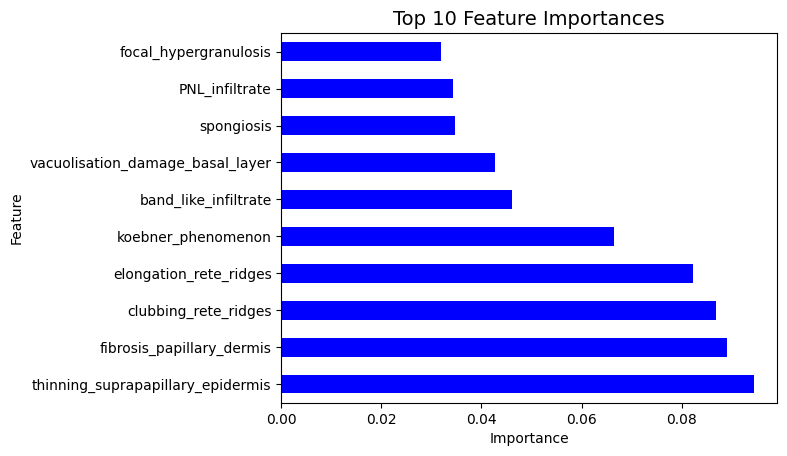

In [21]:
# Feature Importance

from sklearn.ensemble import RandomForestClassifier

X = df_dv.drop(columns=['class', 'age'])
y = df_dv['class']

model = RandomForestClassifier()
model.fit(X, y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='blue')
plt.title('Top 10 Feature Importances', fontsize=14)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

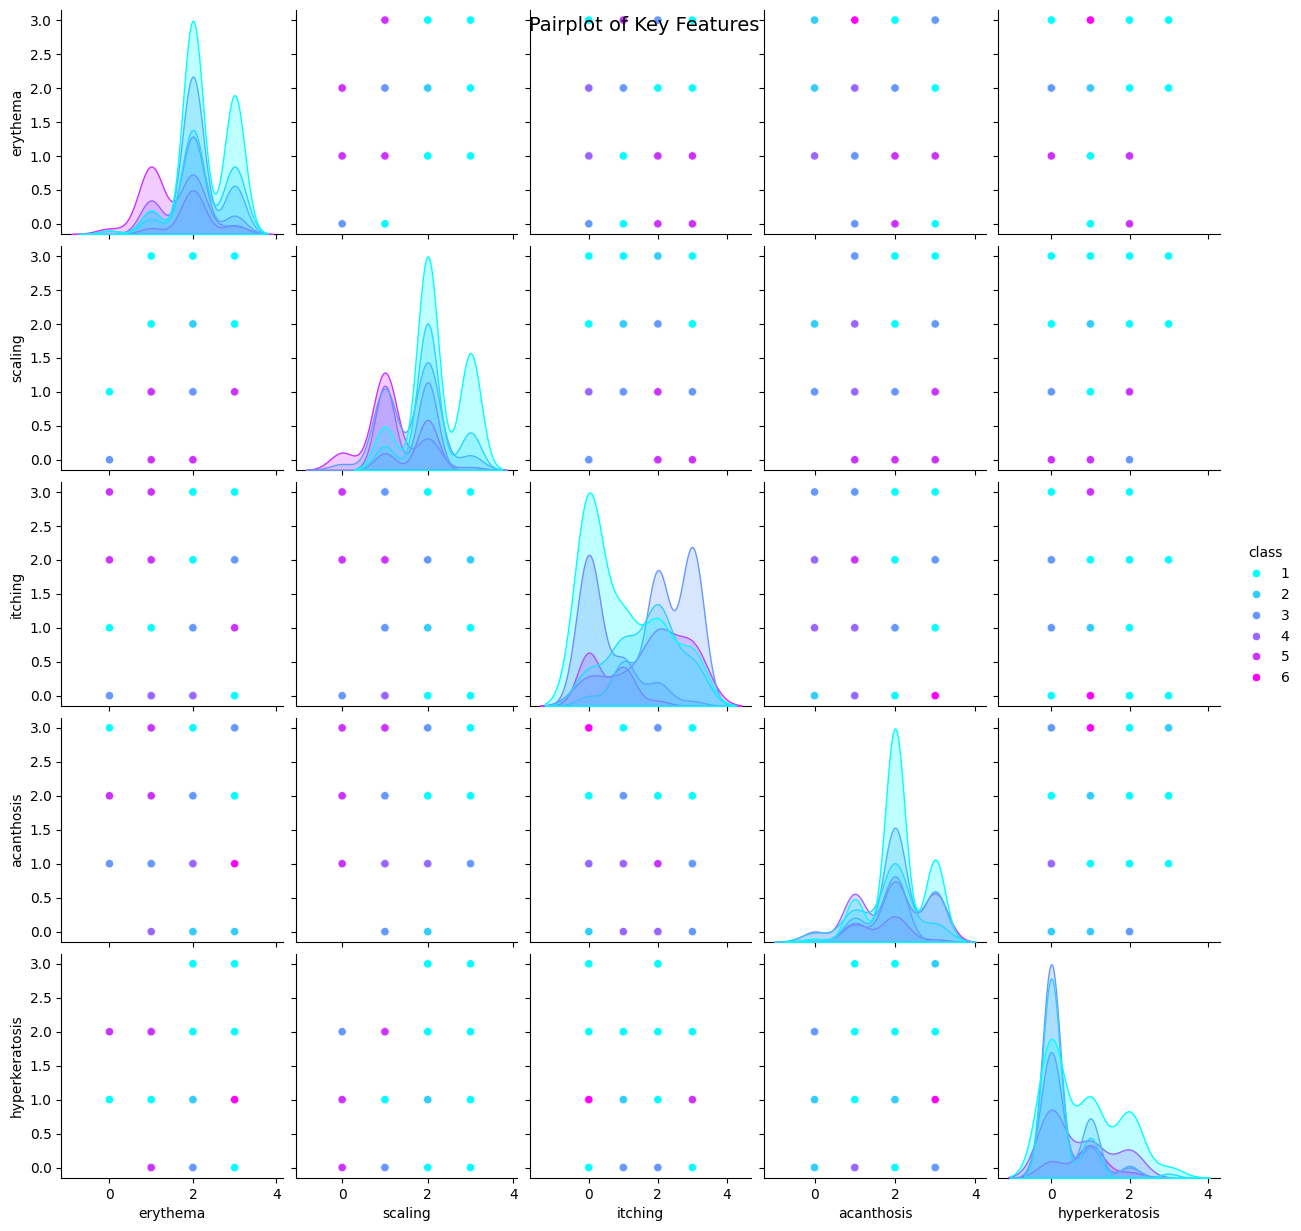

In [22]:
# Pairplot of Important Features

sns.pairplot(df_dv, vars=['erythema', 'scaling', 'itching', 'acanthosis', 'hyperkeratosis'], hue='class', palette='cool')
plt.suptitle('Pairplot of Key Features', fontsize=14)
plt.show()

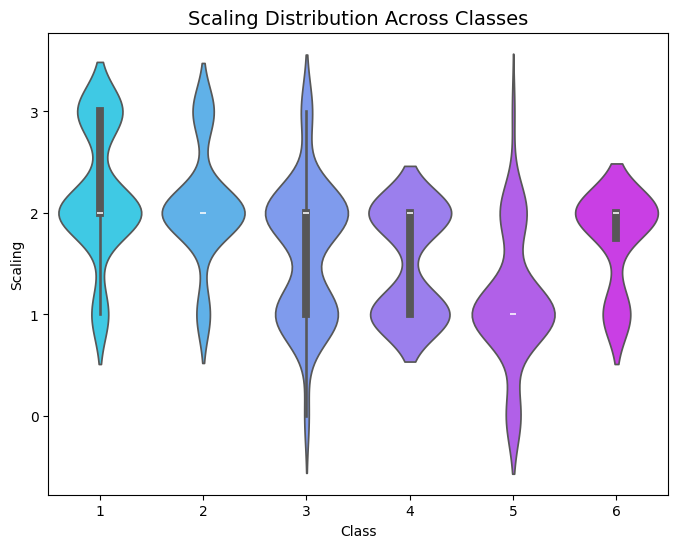

In [23]:
# Violin Plot for Scaling Across Classes

plt.figure(figsize=(8, 6))
sns.violinplot(data=df_dv, x='class', y='scaling', palette='cool')
plt.title('Scaling Distribution Across Classes', fontsize=14)
plt.xlabel('Class')
plt.ylabel('Scaling')
plt.show()

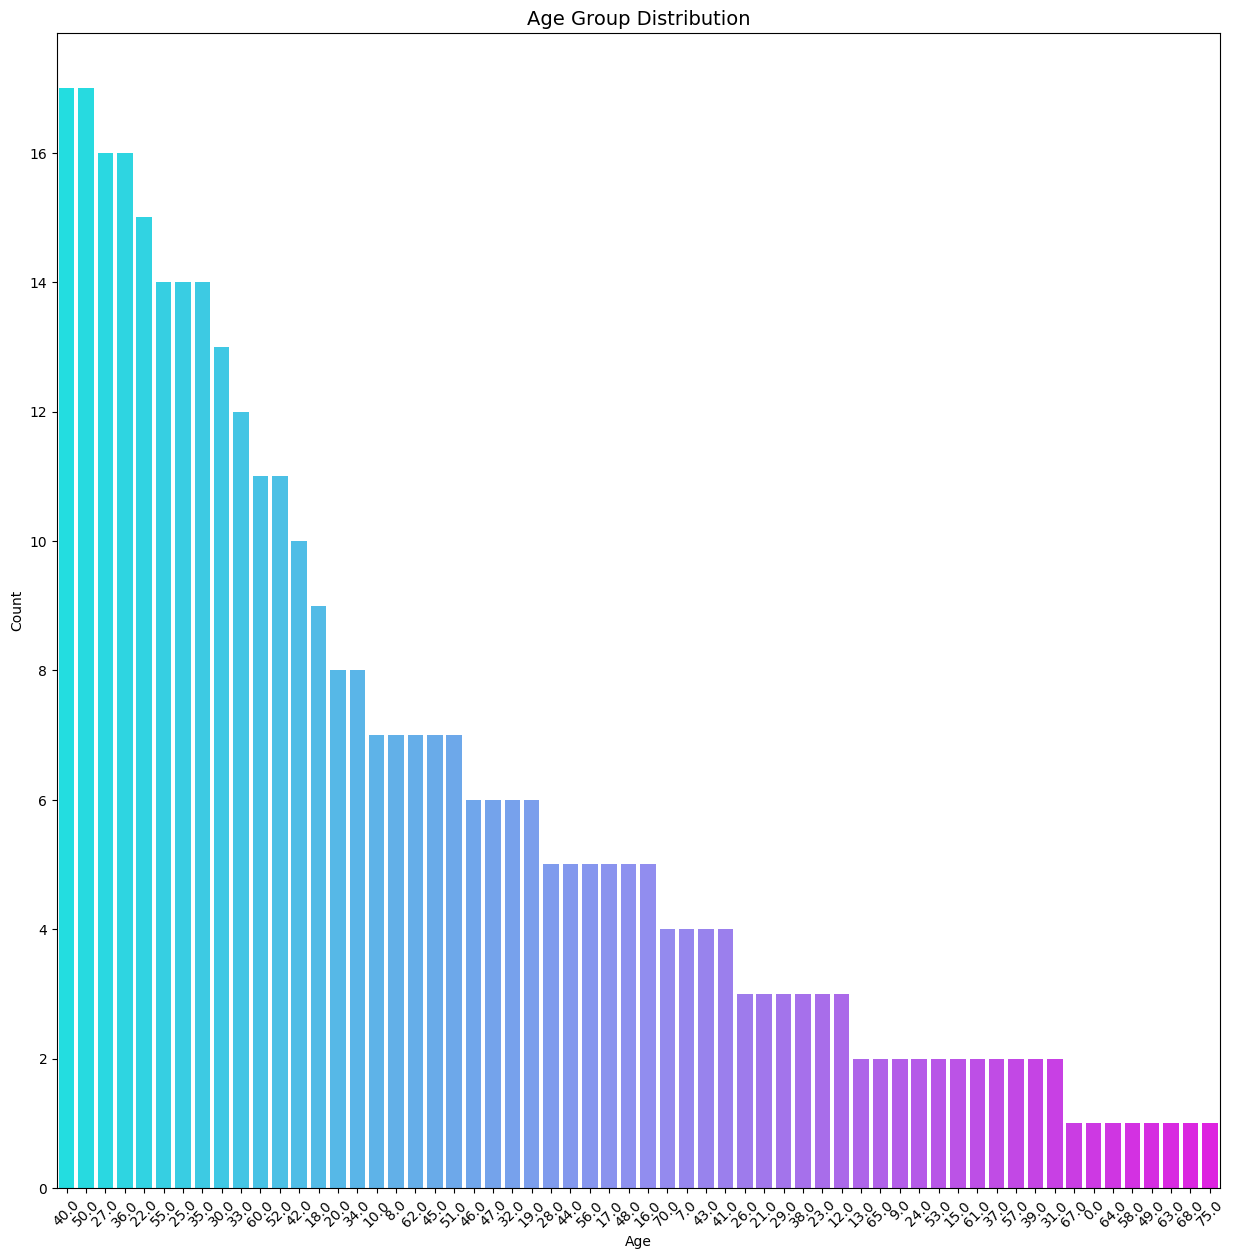

In [24]:
# Countplot for categorical feature

plt.figure(figsize=(15, 15))
sns.countplot(data=df_dv, x='age', palette='cool', order=df_dv['age'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Age Group Distribution', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

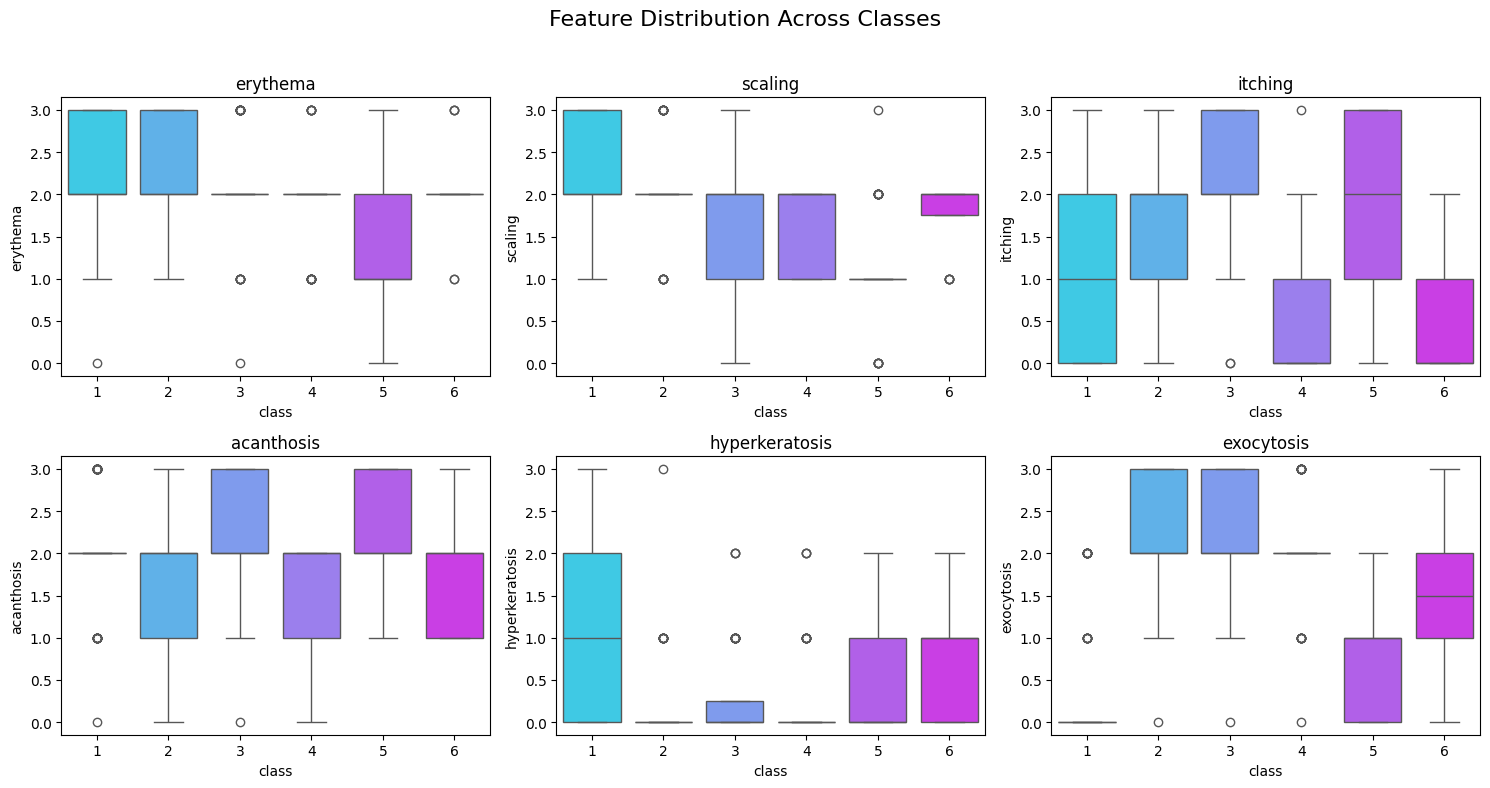

In [25]:
# Distribution of Features Across Classes (Boxplot Grid)

features = ['erythema', 'scaling', 'itching', 'acanthosis', 'hyperkeratosis', 'exocytosis']
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Feature Distribution Across Classes', fontsize=16)

for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    sns.boxplot(data=df_dv, x='class', y=feature, ax=axes[row, col], palette='cool')
    axes[row, col].set_title(feature)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

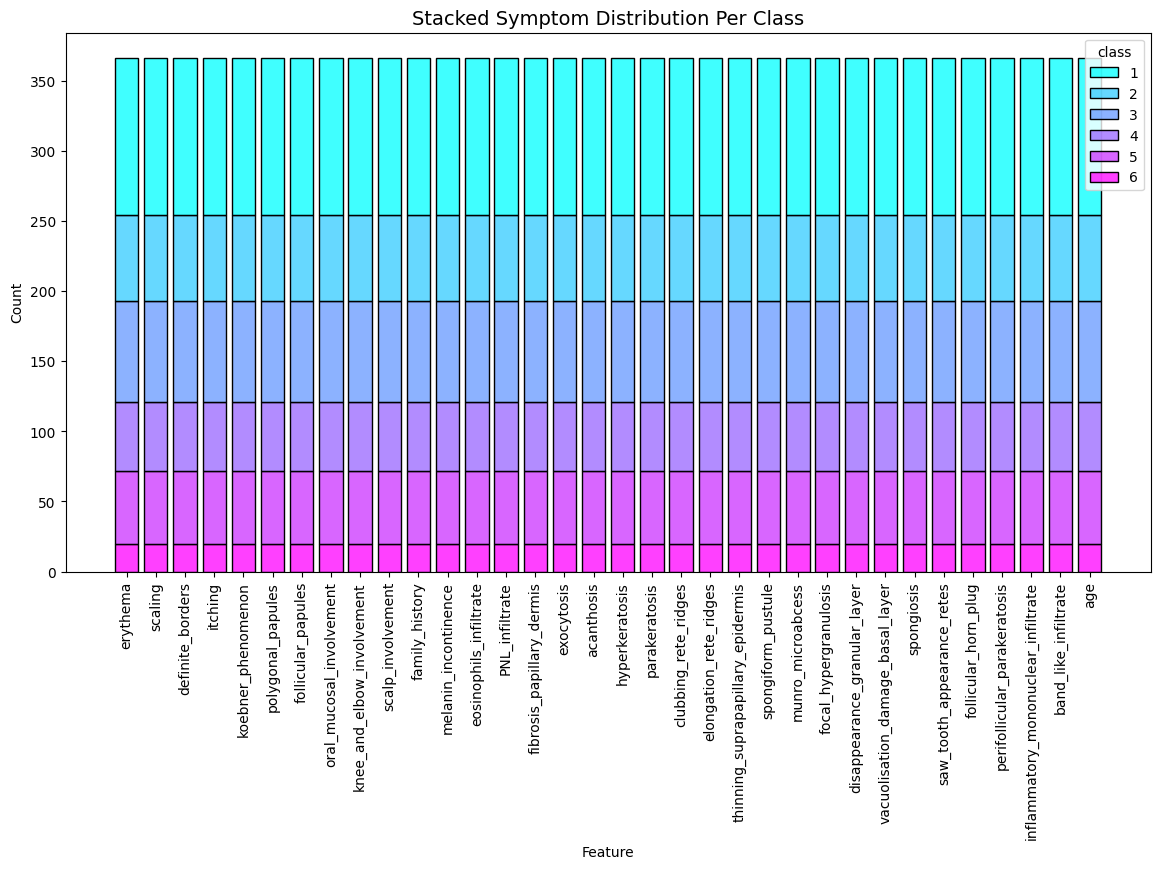

In [26]:
# Stacked Bar Chart for Multiple Symptoms Per Class

df_dv_melted = df_dv.melt(id_vars=['class'], var_name='Feature', value_name='Presence')
plt.figure(figsize=(14, 7))
sns.histplot(data=df_dv_melted, x='Feature', hue='class', multiple='stack', palette='cool', shrink=0.8)
plt.xticks(rotation=90)
plt.title('Stacked Symptom Distribution Per Class', fontsize=14)
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

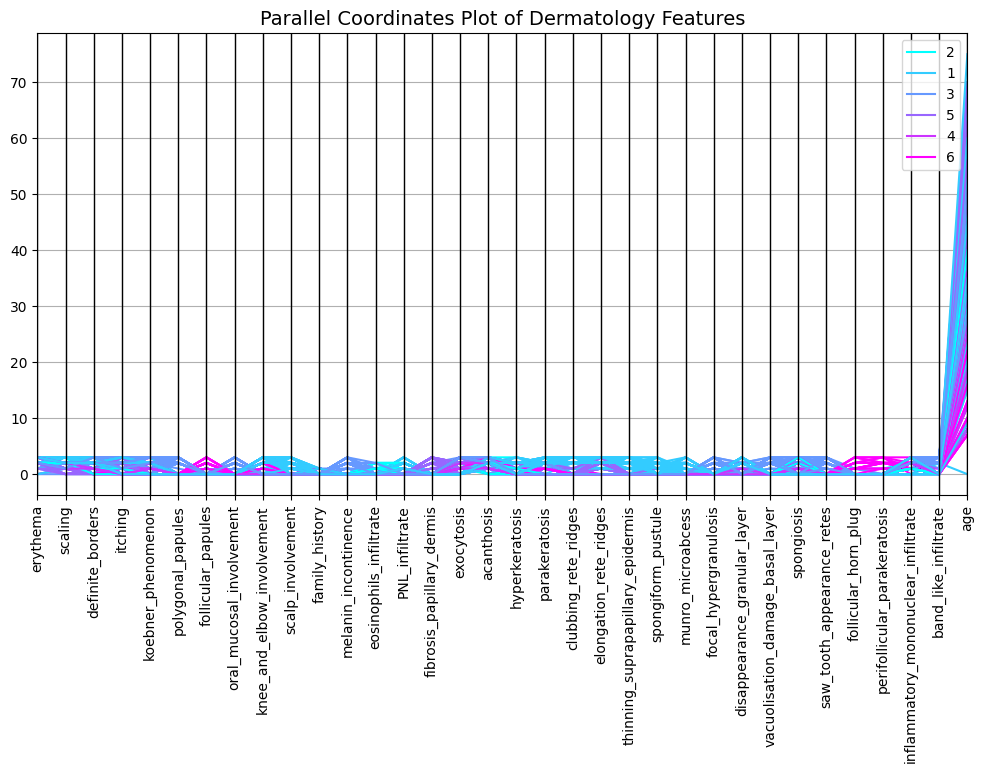

In [27]:
# Parallel Coordinates Plot

from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12, 6))
parallel_coordinates(df_dv, class_column='class', colormap=plt.get_cmap("cool"))
plt.xticks(rotation=90)
plt.title('Parallel Coordinates Plot of Dermatology Features', fontsize=14)
plt.show()

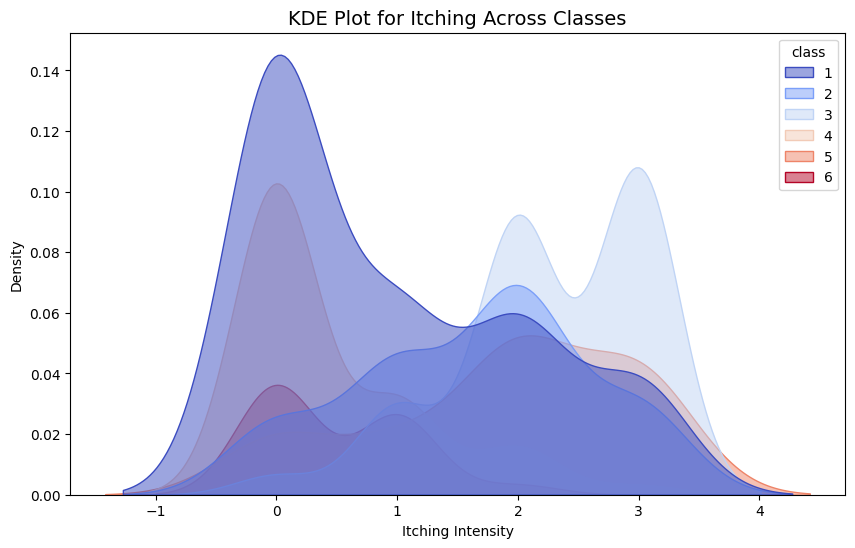

In [28]:
#  KDE Plot for Continuous Variables

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_dv, x='itching', hue='class', fill=True, palette='coolwarm', alpha=0.5)
plt.title('KDE Plot for Itching Across Classes', fontsize=14)
plt.xlabel('Itching Intensity')
plt.ylabel('Density')
plt.show()

<Figure size 1200x800 with 0 Axes>

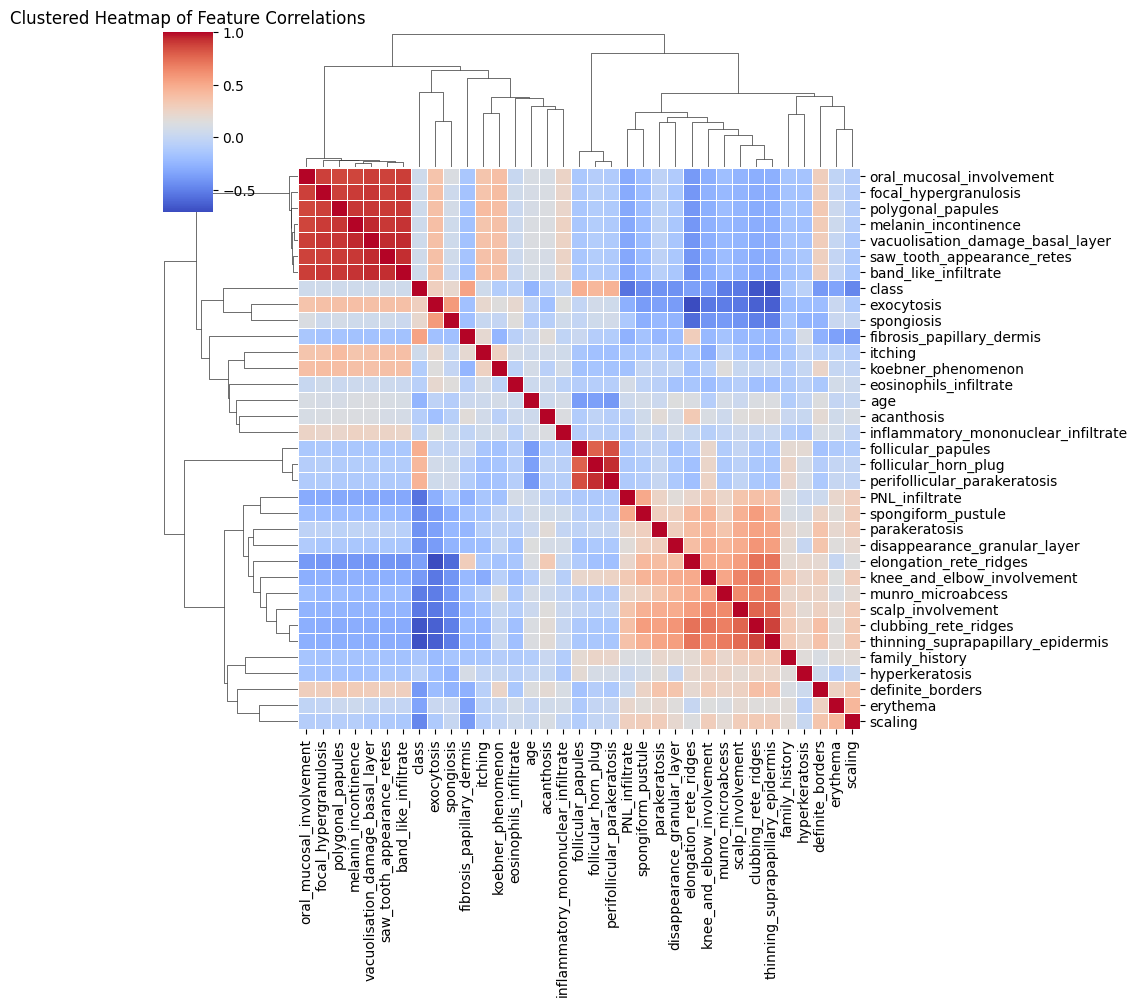

In [29]:
# Pairwise Correlation of Features Using Clustermap

plt.figure(figsize=(12, 8))
sns.clustermap(df_dv.corr(), cmap='coolwarm', linewidths=0.5, annot=False)
plt.title('Clustered Heatmap of Feature Correlations')
plt.show()

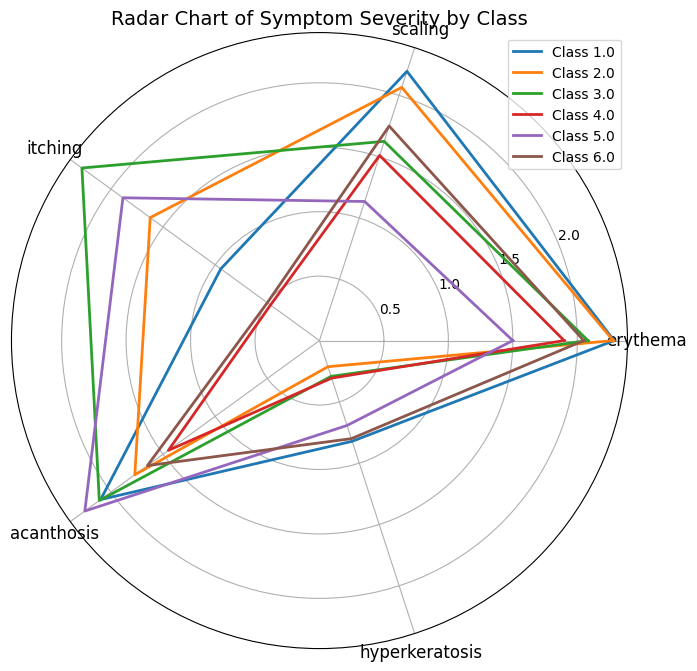

In [30]:
# Radar Chart for Symptom Severity in Classes

from math import pi
features = ['erythema', 'scaling', 'itching', 'acanthosis', 'hyperkeratosis']
df_mean = df_dv.groupby('class')[features].mean().reset_index()

categories = list(features)
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(10, 8))

for i, row in df_mean.iterrows():
    values = row[features].tolist()
    values += values[:1]
    plt.polar(angles, values, label=f'Class {row["class"]}', linewidth=2)

plt.xticks(angles[:-1], categories, fontsize=12)
plt.title("Radar Chart of Symptom Severity by Class", fontsize=14)
plt.legend()
plt.show()


## Data Preprocessing

In [31]:
# Dropping age values which has count less than 2

df = df.groupby('age').filter(lambda x: len(x) >= 2)

In [32]:
# Removing Noise from age column

df = df[df['age'] != '?']

In [33]:
# Conveting Age column to integer type

df = df.astype({'age': np.int64})

In [34]:
# Labeling Train and Test Data

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [35]:
# Laabel Encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 350 samples in 0.002s...
[t-SNE] Computed neighbors for 350 samples in 0.042s...
[t-SNE] Computed conditional probabilities for sample 350 / 350
[t-SNE] Mean sigma: 3.575148
[t-SNE] Computed conditional probabilities in 0.014s
[t-SNE] Iteration 50: error = 51.7074280, gradient norm = 0.0269709 (50 iterations in 0.137s)
[t-SNE] Iteration 100: error = 50.8981171, gradient norm = 0.0032734 (50 iterations in 0.109s)
[t-SNE] Iteration 150: error = 50.8753777, gradient norm = 0.0058282 (50 iterations in 0.111s)
[t-SNE] Iteration 200: error = 50.8767052, gradient norm = 0.0118397 (50 iterations in 0.086s)
[t-SNE] Iteration 250: error = 50.8763084, gradient norm = 0.0131249 (50 iterations in 0.099s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.876308
[t-SNE] Iteration 300: error = 0.3541623, gradient norm = 0.0063719 (50 iterations in 0.117s)
[t-SNE] Iteration 350: error = 0.3186606, gradient norm = 0.0040323 (

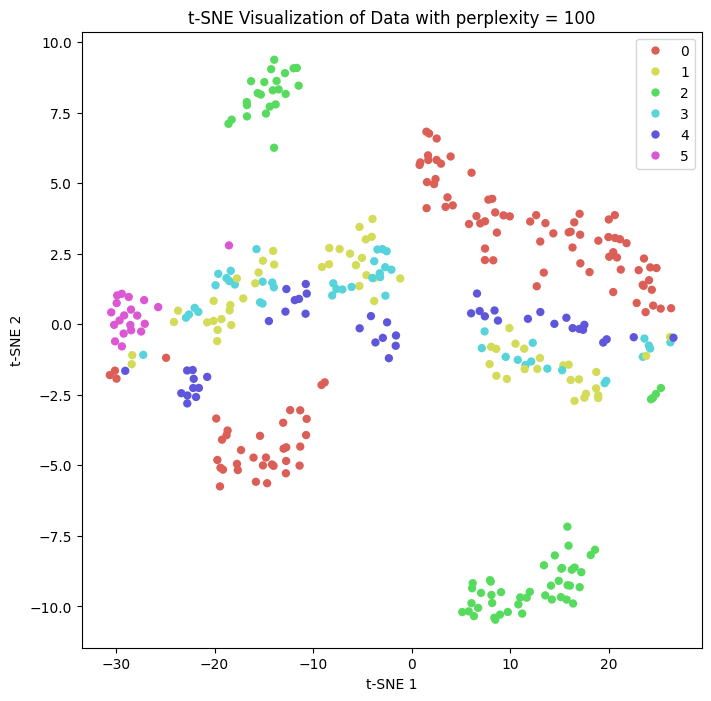

In [36]:
# Applyisng t-Distributed Stochastic Neighbor Embedding for visualization

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=110, verbose=2, perplexity = 30)
x_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=x_tsne[:,0], y=x_tsne[:,1],
    hue=y, palette=sns.color_palette("hls", len(np.unique(y))),
    alpha=1, edgecolor='none'
)

plt.title('t-SNE Plot for Dermatology Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Data with perplexity = 100')
plt.legend(loc='upper right')
plt.show()

In [37]:
# Train Test and Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 110)

## Model Building

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import r2_score, confusion_matrix

In [39]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "LightGBM": LGBMClassifier(force_row_wise=True, verbose=-1)
}

In [40]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    score = r2_score(y_test, model.predict(X_test))
    results.append([name, score])


results_df = pd.DataFrame(results, columns=["Algorithm", "R2 Score"])
print(results_df)

             Algorithm  R2 Score
0  Logistic Regression  0.973152
1        Decision Tree  0.939592
2        Random Forest  0.973152
3          Extra Trees  0.973152
4              XGBoost  0.946304
5             CatBoost  0.973152
6             LightGBM  0.946304


### Logestic Regression

In [41]:
lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

#### Model Evaluation

In [42]:
# R2 Score

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.9731517882826733


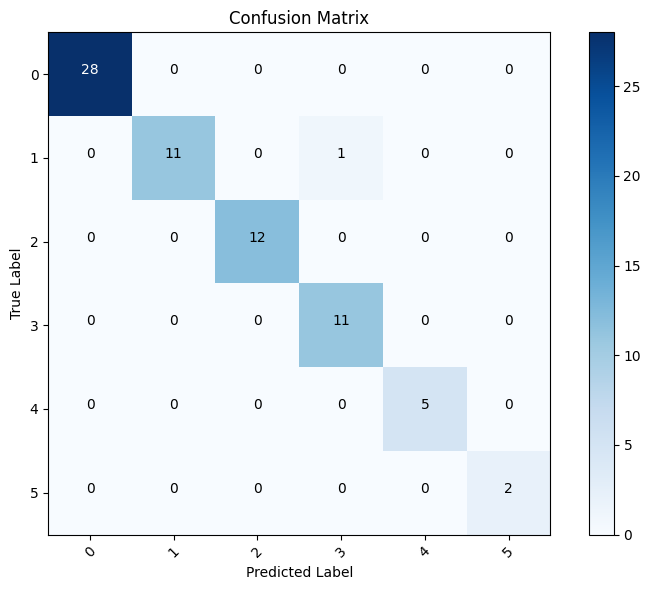

In [43]:
# Plotting Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
classes = ['0', '1', '2', '3', '4', '5']

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

### Random Forest

In [44]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

#### Model Evaluation

In [45]:
# R2 Score

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.9731517882826733


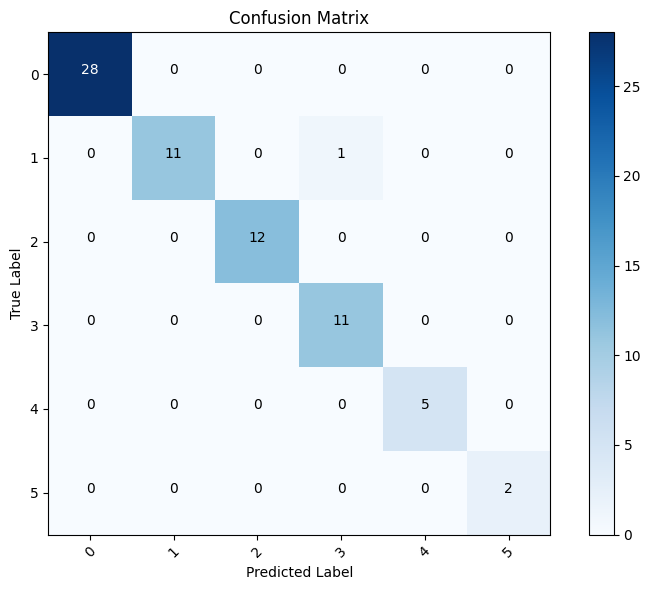

In [46]:
# Plotting Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
classes = ['0', '1', '2', '3', '4', '5']

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

## LightGBM

In [47]:
cb_model = CatBoostClassifier(verbose=0)

cb_model.fit(X_train, y_train)

y_pred = cb_model.predict(X_test)

#### Model Evaluarion

In [48]:
# R2 Score

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.9731517882826733


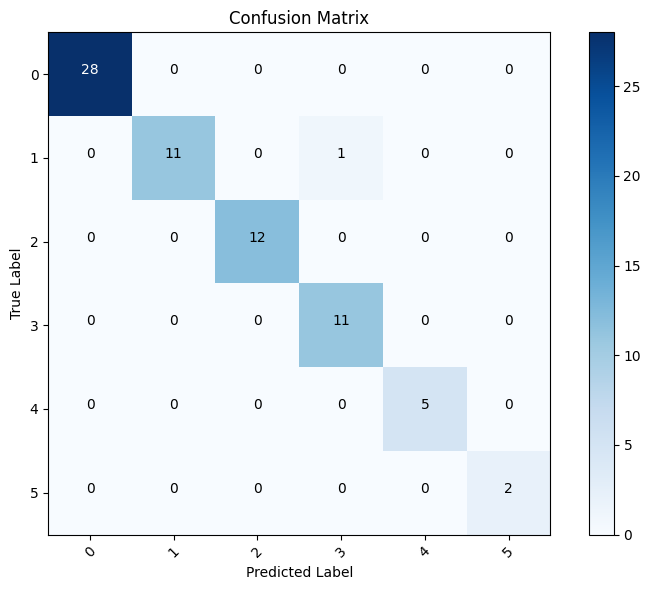

In [49]:
# Plotting Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
classes = ['0', '1', '2', '3', '4', '5']

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()